In [3]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
from math import sqrt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
longley=pd.read_csv('longley.csv')

In [7]:
print("The dimension of the dataset is:",longley.shape)
print("The dimension of the variables in the data set are:\n",longley.columns)

The dimension of the dataset is: (16, 7)
The dimension of the variables in the data set are:
 Index(['y', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6'], dtype='object')


In [9]:
print("Null values in dataset:\n",longley.isnull().sum())
print("Not available values in dataset:\n",longley.isna().sum())

Null values in dataset:
 y     0
x1    0
x2    0
x3    0
x4    0
x5    0
x6    0
dtype: int64
Not available values in dataset:
 y     0
x1    0
x2    0
x3    0
x4    0
x5    0
x6    0
dtype: int64


In [13]:
np.random.seed(3000)
training,test=train_test_split(longley,test_size=0.3)
x_trg=training.drop('y',axis=1)
y_trg=training['y']
x_test=test.drop('y',axis=1)
y_test=test['y']

In [15]:
print("----------Decision Tree Model---------")
treelongley=DecisionTreeRegressor(random_state=0)
treelongley.fit(x_trg,y_trg)

----------Decision Tree Model---------


DecisionTreeRegressor(random_state=0)

In [17]:
print('The importance of features of decision tree model for longley data set:\n',treelongley.feature_importances_)

The importance of features of decision tree model for longley data set:
 [1.52837434e-02 7.31292815e-01 1.30396594e-04 0.00000000e+00
 9.71814107e-02 1.56111634e-01]


In [54]:
# export_graphviz(treelongley, out_file="longley.dot", feature_names=x_trg.columns,impurity=False,filled=True)

[Text(0.5657894736842105, 0.9, 'x[1] <= 364248.5\nsquared_error = 8053751.884\nsamples = 11\nvalue = 63750.545'),
 Text(0.34210526315789475, 0.7, 'x[5] <= 1950.5\nsquared_error = 2117187.061\nsamples = 7\nvalue = 61917.714'),
 Text(0.21052631578947367, 0.5, 'x[0] <= 88.35\nsquared_error = 209305.188\nsamples = 4\nvalue = 60700.75'),
 Text(0.10526315789473684, 0.3, 'x[2] <= 3019.0\nsquared_error = 5776.0\nsamples = 2\nvalue = 60247.0'),
 Text(0.05263157894736842, 0.1, 'squared_error = 0.0\nsamples = 1\nvalue = 60323.0'),
 Text(0.15789473684210525, 0.1, 'squared_error = 0.0\nsamples = 1\nvalue = 60171.0'),
 Text(0.3157894736842105, 0.3, 'x[1] <= 272012.5\nsquared_error = 1056.25\nsamples = 2\nvalue = 61154.5'),
 Text(0.2631578947368421, 0.1, 'squared_error = 0.0\nsamples = 1\nvalue = 61122.0'),
 Text(0.3684210526315789, 0.1, 'squared_error = 0.0\nsamples = 1\nvalue = 61187.0'),
 Text(0.47368421052631576, 0.5, 'x[4] <= 112672.5\nsquared_error = 53467.556\nsamples = 3\nvalue = 63540.333'),

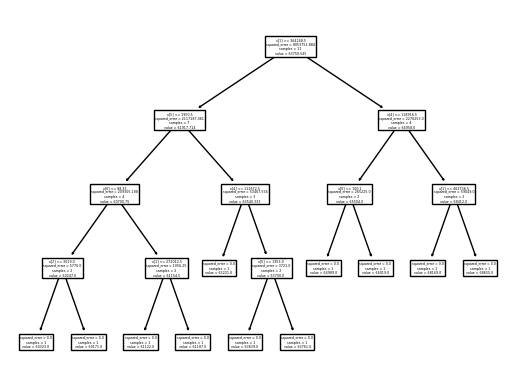

In [48]:
from sklearn.tree import plot_tree
plot_tree(treelongley)

In [50]:
tree_pred=treelongley.predict(x_test)

In [31]:
tree_rmse=sqrt(mean_squared_error(y_test,tree_pred))
print('RMSE value for Decision Tree model is:%0.4f' %tree_rmse)

RMSE value for Decision Tree model is:1483.1489


In [33]:
print("----------New Decision Tree Model---------")
treelongleynew=DecisionTreeRegressor(max_depth=3,random_state=0)
treelongleynew.fit(x_trg,y_trg)

----------New Decision Tree Model---------


DecisionTreeRegressor(max_depth=3, random_state=0)

In [35]:
# export_graphviz(treelongleynew,out_file="longleytree.dot",feature_names=x_trg.columns,impurity=False,filled=True)

[Text(0.5, 0.875, 'x[1] <= 364248.5\nsquared_error = 8053751.884\nsamples = 11\nvalue = 63750.545'),
 Text(0.25, 0.625, 'x[5] <= 1950.5\nsquared_error = 2117187.061\nsamples = 7\nvalue = 61917.714'),
 Text(0.125, 0.375, 'x[0] <= 88.35\nsquared_error = 209305.188\nsamples = 4\nvalue = 60700.75'),
 Text(0.0625, 0.125, 'squared_error = 5776.0\nsamples = 2\nvalue = 60247.0'),
 Text(0.1875, 0.125, 'squared_error = 1056.25\nsamples = 2\nvalue = 61154.5'),
 Text(0.375, 0.375, 'x[5] <= 1951.5\nsquared_error = 53467.556\nsamples = 3\nvalue = 63540.333'),
 Text(0.3125, 0.125, 'squared_error = 0.0\nsamples = 1\nvalue = 63221.0'),
 Text(0.4375, 0.125, 'squared_error = 3721.0\nsamples = 2\nvalue = 63700.0'),
 Text(0.75, 0.625, 'x[1] <= 420119.0\nsquared_error = 2276253.0\nsamples = 4\nvalue = 66958.0'),
 Text(0.625, 0.375, 'x[4] <= 116241.0\nsquared_error = 265225.0\nsamples = 2\nvalue = 65504.0'),
 Text(0.5625, 0.125, 'squared_error = 0.0\nsamples = 1\nvalue = 64989.0'),
 Text(0.6875, 0.125, 'squa

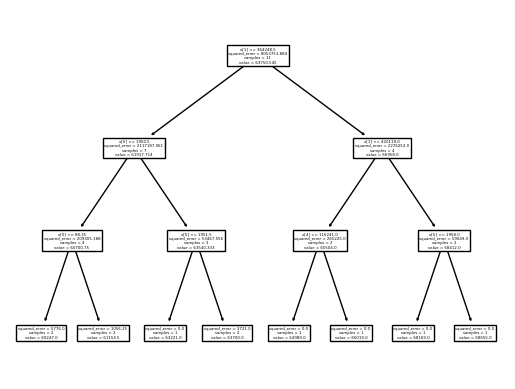

In [52]:
from sklearn.tree import plot_tree
plot_tree(treelongleynew)

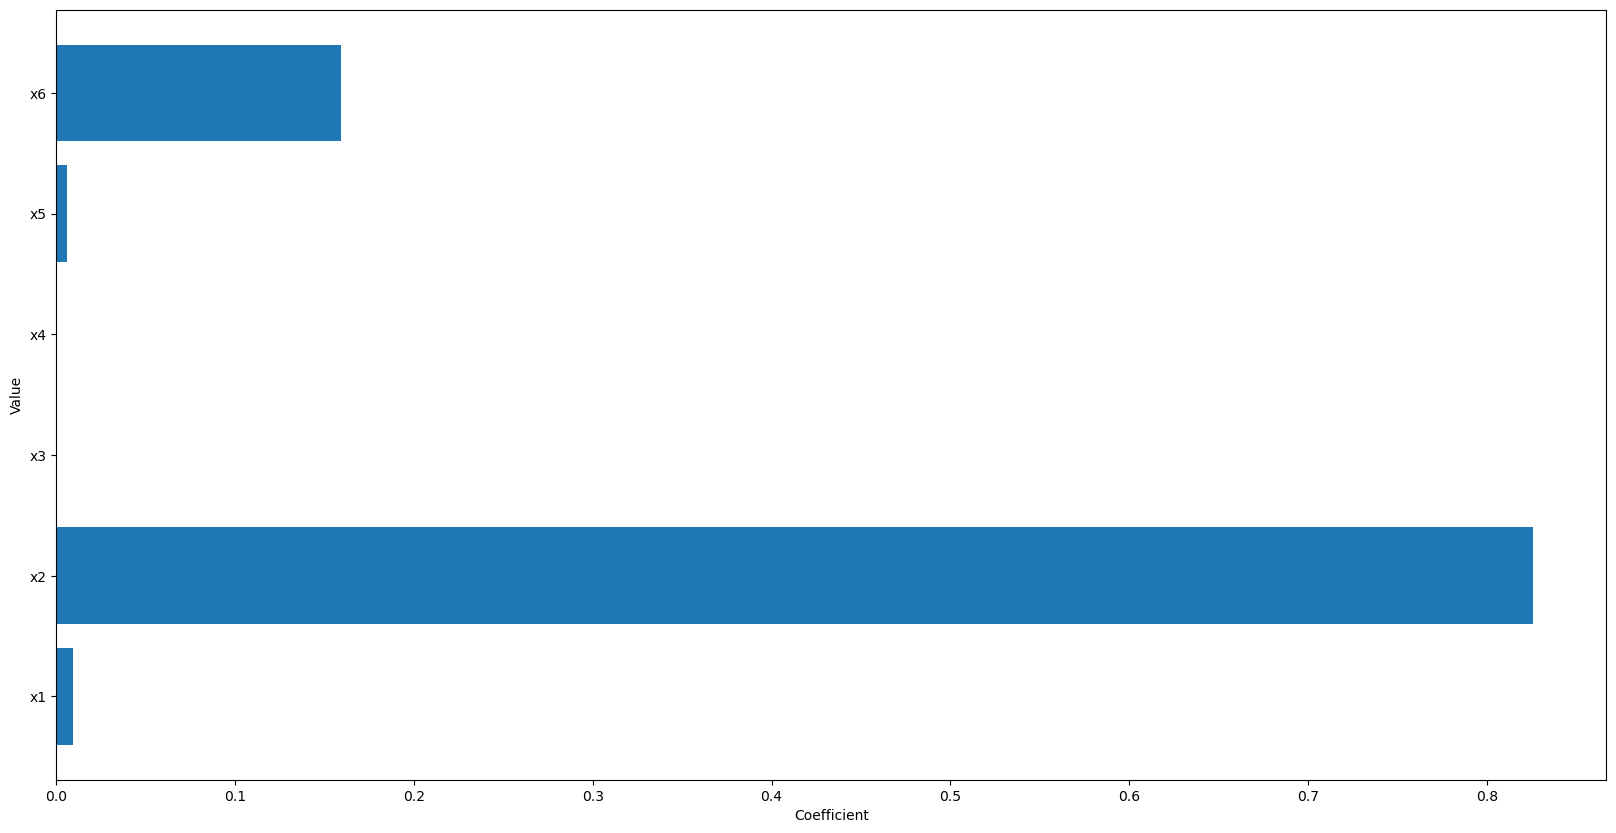

In [40]:
plt.figure(1,figsize=(20,10))
plt.yticks(range(0,6),x_trg.columns)
plt.barh(range(0,6),treelongleynew.feature_importances_,align='center')
plt.xlabel("Coefficient")
plt.ylabel("Value")
plt.show()

In [42]:
tree_pred2=treelongleynew.predict(x_test)

In [46]:
tree_rmse2=sqrt(mean_squared_error(y_test,tree_pred2))
print('RMSE value for Decision Tree model is:%0.4f' %tree_rmse2)

RMSE value for Decision Tree model is:1483.1489
